In [56]:
# The first subset is known as the training data - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model. 

# Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results. 
# Testing data has two main criteria. It should:
# -Represent the actual dataset 
# -Be large enough to generate meaningful predictions


import pandas as pd
# Pandas is an open-source Python package used for data analysis and manipulation tasks. It is built on top of Numpy, which provides support for multi-dimensional arrays.

housing=pd.read_csv("./data.csv")
# housing.head() # this will display the first 5 rows of the data in table format
# housing.info() # this will give the information about the data such as total number of entries

# housing['CHAS'].value_counts() # will give the count of all the possible values of the given feature

housing.describe() # will give the details of eah feature such as std, mean, min, count, max, etc.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

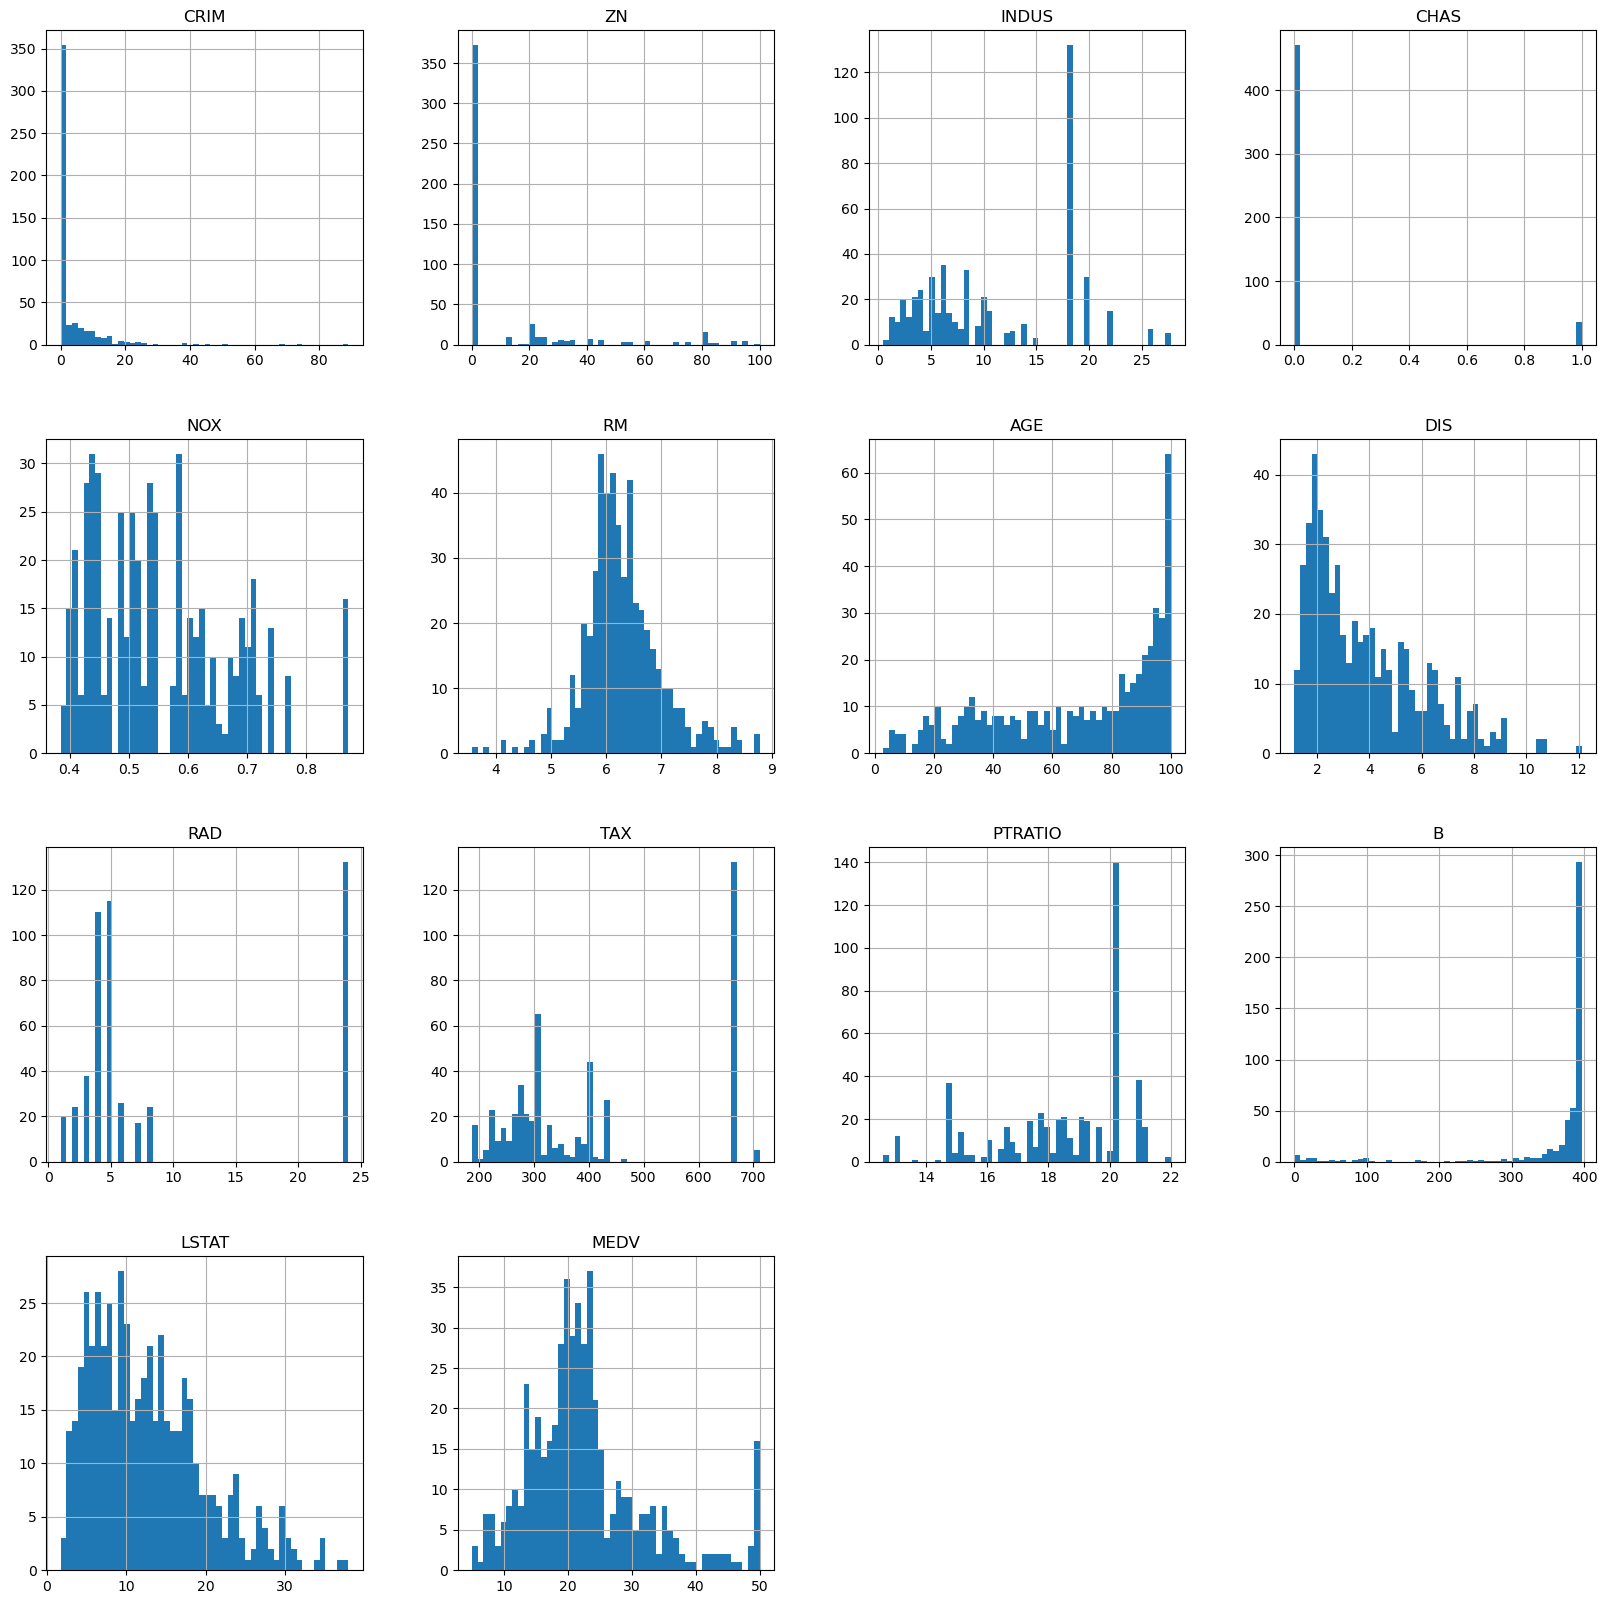

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,20))

## Train Test Splitting

In [58]:
# This is for learning how the function works internally
# import numpy as np

# def split_train_test(data,test_ratio):
#     np.random.seed(42) #

#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)* test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[test_indices], data.iloc[train_indices]

In [59]:
# test_set,train_set=split_train_test(housing,0.2)

# print(f"Rows in training set: {len(train_set)}\n Rows in test set: {len(test_set)}")

In [60]:
from sklearn.model_selection import  train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

print(f"Rows in training set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in training set: 404
 Rows in test set: 102


In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

## Looking for correlations

In [62]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) # calculating the correlation of money wrt all other features

# pearson correlation coeff 1 means strong positive correlation 
# when this value increases the price of the property will increase

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

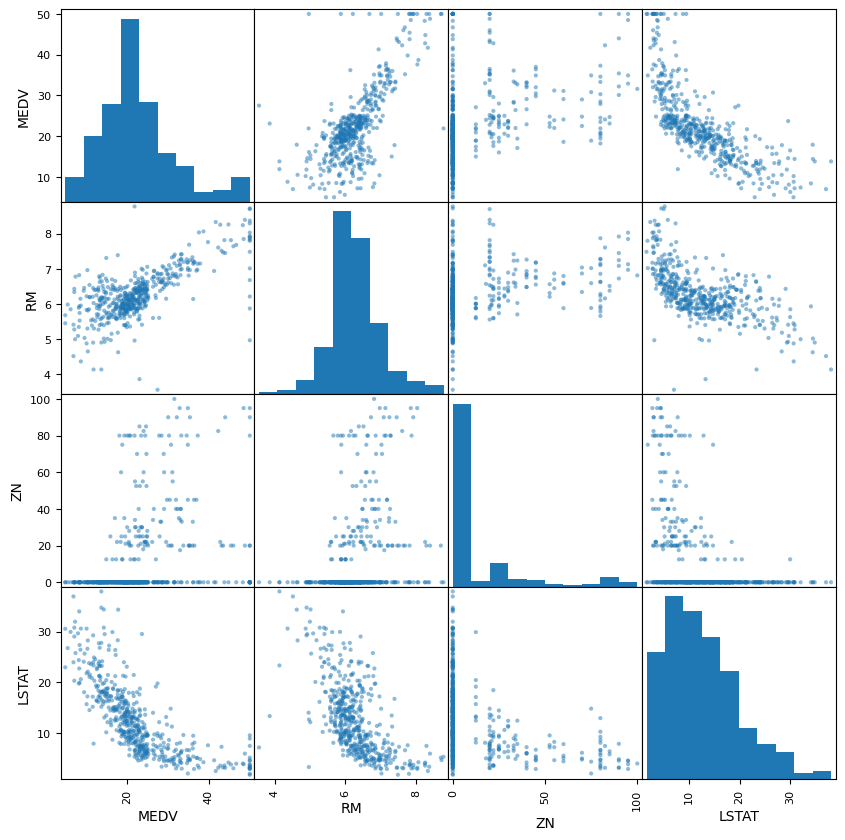

In [63]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']

scatter_matrix(housing[attributes],figsize=(10,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

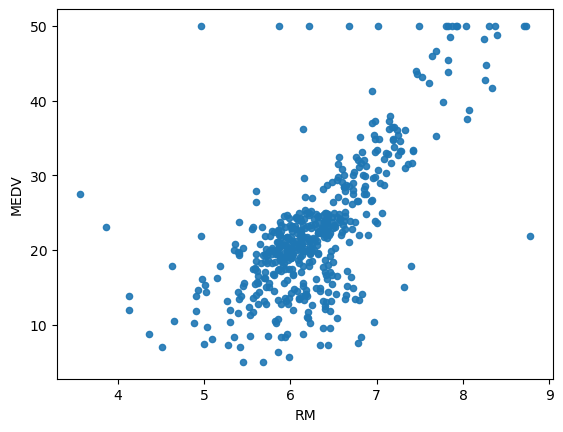

In [64]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.9)

## Trying out attribute combinations